In [1]:
%load_ext autotime

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from decision_tree import DecisionTreeClassifier as mytree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as sktree

time: 687 ms


In [3]:
x_train = pd.read_csv('./part2/traindata.txt', sep='\s+', names = ['docid', 'wordid'])
y_train = pd.read_csv('./part2/trainlabel.txt', sep='\s+', names = ['wordid'])
x_test = pd.read_csv('./part2/testdata.txt', sep='\s+', names = ['docid', 'wordid'])
y_test = pd.read_csv('./part2/testlabel.txt', sep='\s+', names = ['wordid'])
fword = pd.read_csv('./part2/words.txt', sep='\s+', names = ['wordid'])

time: 26.5 ms


In [4]:
nword = len(fword)
newx_train = np.zeros((x_train['docid'].unique().max(), nword))
newx_test = np.zeros((x_test['docid'].unique().max(), nword))
# transformed x_train
for i in range(len(x_train)):
    newx_train[x_train.values[i, 0]-1, x_train.values[i, 1]-1] = 1 
    
# transformed x_test    
for i in range(len(x_test)):
    newx_test[x_test.values[i, 0]-1, x_test.values[i, 1]-1] = 1 

time: 927 ms


In [5]:
newx_train.shape, y_train.shape, newx_test.shape, y_test.shape

((1061, 3566), (1061, 1), (707, 3566), (707, 1))

time: 6.96 ms


In [6]:
def prediction(x_train, y_train, x_test, y_test, \
               model = 'mymodel', criteria='gini', max_depth=3):
    if model == 'mymodel':
        tree = mytree(max_depth = max_depth, min_size = 2, \
                      criteria = criteria).fit(x_train, y_train)
    else:
        tree = sktree(max_depth = max_depth, min_samples_split = 2, \
                      criterion = criteria).fit(x_train, y_train)
        
    test_accuracy = accuracy_score(y_test, tree.predict(x_test))
    train_accuracy = accuracy_score(y_train, tree.predict(x_train))
    return train_accuracy, test_accuracy

time: 5.26 ms


sklearn Gini index criteria


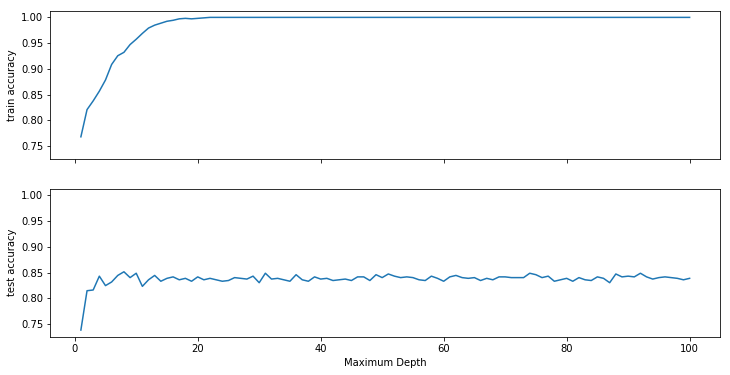

time: 17.4 s


In [11]:
# scikitlearn gini index
print('sklearn Gini index criteria')
depths = np.arange(100)+1
train_accuracy, test_accuracy = [], []
for depth in depths:
    train_acc, test_acc = prediction(newx_train, \
                    y_train, newx_test, y_test, model = 'sklearn', \
                                     criteria='gini', max_depth=depth)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)
axes = axes.flatten()
axes[0].plot(depths, train_accuracy)
axes[0].set_ylabel('train accuracy')
axes[1].plot(depths, test_accuracy)
axes[1].set_ylabel('test accuracy')
axes[1].set_xlabel('Maximum Depth')
plt.show()

sklearn Information Gain criteria


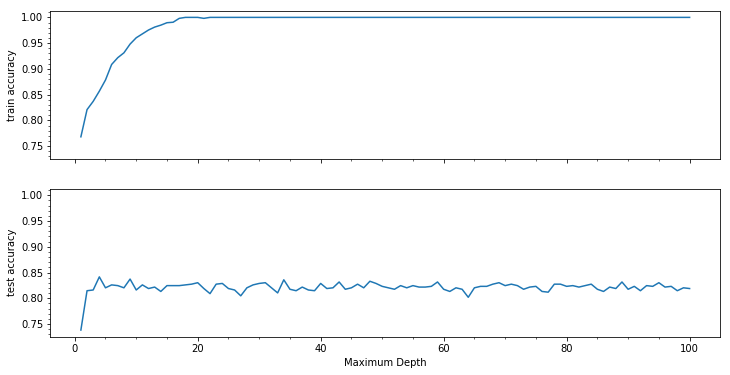

time: 16.8 s


In [10]:
# scikitlearn information gain
print('sklearn Information Gain criteria')
depths = np.arange(100)+1
train_accuracy, test_accuracy = [], []
for depth in depths:
    train_acc, test_acc = prediction(newx_train, \
                    y_train, newx_test, y_test, model = 'sklearn', \
                                     criteria='entropy', max_depth=depth)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)
axes = axes.flatten()
axes[0].plot(depths, train_accuracy)
axes[0].set_ylabel('train accuracy')
axes[1].plot(depths, test_accuracy)
axes[1].set_ylabel('test accuracy')
axes[1].set_xlabel('Maximum Depth')
axes[0].minorticks_on()
plt.show()

In [ ]:
# scikitlearn gini
print('mymodel gini index criteria')
depths = np.arange(100)+1
train_accuracy, test_accuracy = [], []
for depth in depths:
    train_acc, test_acc = prediction(newx_train, \
                    y_train, newx_test, y_test, model = 'mymodel', \
                                     criteria='gini', max_depth=depth)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)
axes = axes.flatten()
axes[0].plot(depths, train_accuracy)
axes[0].set_ylabel('train accuracy')
axes[1].plot(depths, test_accuracy)
axes[1].set_ylabel('test accuracy')
axes[1].set_ylabel('Maximum Depth')
plt.show()

In [ ]:
# scikitlearn gini
print('mymodel information gain criteria')
depths = np.arange(100)+1
train_accuracy, test_accuracy = [], []
for depth in depths:
    train_acc, test_acc = prediction(newx_train, \
                    y_train, newx_test, y_test, model = 'mymodel', \
                                     criteria='information gain', max_depth=depth)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)
axes = axes.flatten()
axes[0].plot(depths, train_accuracy)
axes[0].set_ylabel('train accuracy')
axes[1].plot(depths, test_accuracy)
axes[1].set_ylabel('test accuracy')
axes[1].set_ylabel('Maximum Depth')
plt.show()